# Assignment 1 - Scripps Pier Temperature

In [28]:
# libraries i used for this assignment
from scipy.io import loadmat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# load data
data = loadmat('data/SIO_TEMP_Fixed.mat', squeeze_me=True)
print(data.keys()) # inspect file
# extract variables
T = data['T']
yr = data['yr']
mo = data['mo']
day = data['dy']

# create pandas dataframe to organize data for easier handling
df = pd.DataFrame({
    'year': yr,
     'month' : mo,
     'day':day,
     'T': T}
)
df['date'] = pd.to_datetime(df[['year','month','day']])
df = df.set_index('date') # combine yr,mo,day and make it into the index
df

dict_keys(['__header__', '__version__', '__globals__', 'T', 'dy', 'mo', 'None', 'yr', '__function_workspace__'])


,year,month,day,T
date,,,,
1917-01-01,1917,1,1,11.50
1917-01-02,1917,1,2,11.50
1917-01-03,1917,1,3,11.90
1917-01-04,1917,1,4,11.50
1917-01-05,1917,1,5,11.70
...,...,...,...,...
2023-12-27,2023,12,27,17.10
2023-12-28,2023,12,28,17.10
2023-12-29,2023,12,29,16.90


#### **Figure 1**: Plot of SIO temperature with extreme high (>99%) and low (<1%) values indicated

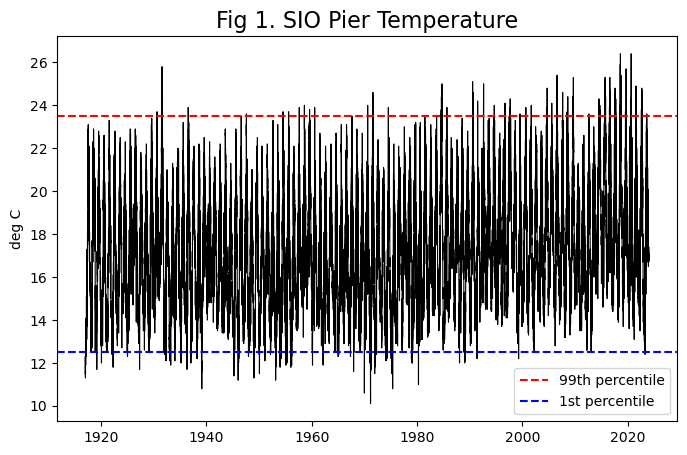

In [59]:
fig, ax = plt.subplots(figsize=(8,5))
# plot full time series
plt.plot(df.index, df['T'], 'k', linewidth=0.8)

# percentiles
p99 = np.percentile(T,99)
p01 = np.percentile(T, 1)
plt.axhline(p99, color='r',  linestyle='--', label='99th percentile')
plt.axhline(p01, color='b', linestyle='--', label='1st percentile')

# labelling/plotting code
plt.ylabel('deg C')
plt.title('Fig 1. SIO Pier Temperature', fontsize=16)
plt.legend()

# Display figure
plt.show()

#### **Figure 2**: Histogram of year of high values

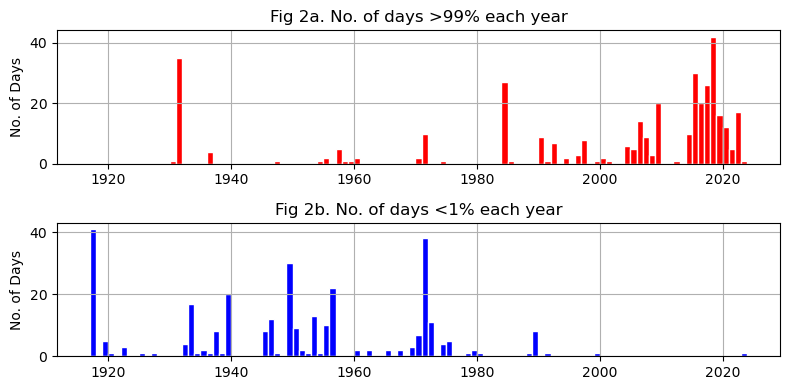

In [63]:
hot_yr = df[df['T'] > p99]['year'] # years that have T's > 99th percentile
cold_yr = df[df['T'] < p01]['year']


fig, (ax1,ax2) = plt.subplots(2,1, figsize=(8,4))

# 2a: years with hot days
ax1.hist(hot_yr, bins=range(1917,2025),facecolor='r', edgecolor='w')
ax1.set_ylabel('No. of Days')
ax1.set_title('Fig 2a. No. of days >99% each year')
ax1.grid(True)

# 2b: years with cold days
ax2.hist(cold_yr, bins=range(1917,2025),facecolor='b', edgecolor='w')
ax2.set_ylabel('No. of Days')
ax2.set_title('Fig 2b. No. of days <1% each year')
ax2.grid(True)

plt.tight_layout()
plt.show()



#### **Figure 3:** Histogram of month of high values

Text(0.5, 0, 'month')

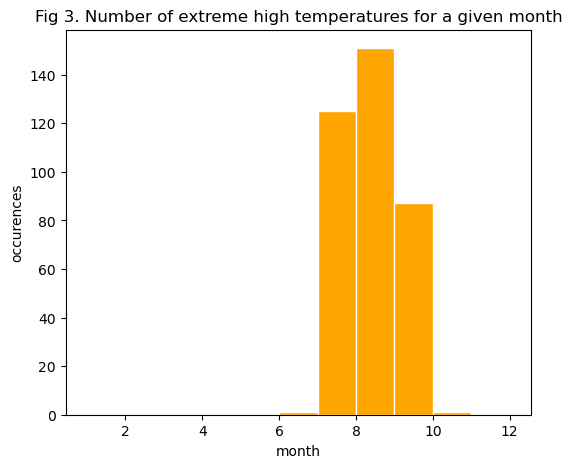

In [72]:
fig, ax = plt.subplots(figsize=(6,5))

hot_mo = df[df['T']>p99]['month']
ax.hist(hot_mo, bins=range(1,13,1), edgecolor='w', facecolor='orange')
ax.set_title('Fig 3. Number of extreme high temperatures for a given month')
ax.set_ylabel('occurences')
ax.set_xlabel('month')


#### **Figure 4:** Histograms on JAS summer temperature during first 30 and last 30 years

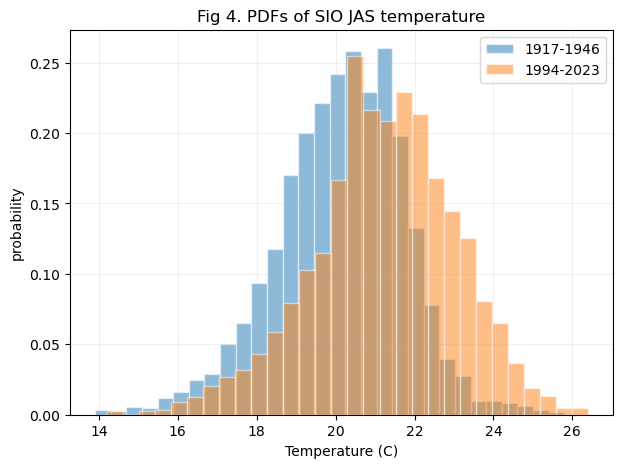

In [90]:
# df with just JAS
JAS = df[(df['month'] < 10) & (df['month'] > 6)]

mask_f30 = JAS['year'].min()+30 # min year plus 30 
mask_l30 = JAS['year'].max() - 30 # max year minus 30
# df's with first 30 years and last 30 years
first30 = JAS[JAS['year'] < mask_f30]
last30 = JAS[JAS['year'] > mask_l30]

fig, ax = plt.subplots(1,1,figsize=(7,5))

ax.hist(first30['T'], bins=30, density=True, alpha=0.5, label='1917-1946', edgecolor='w')
ax.hist(last30['T'], bins=30, density=True, alpha=0.5, label='1994-2023', edgecolor='w')

ax.set_ylabel('probability')
ax.set_xlabel('Temperature (C)')
ax.set_title('Fig 4. PDFs of SIO JAS temperature')
ax.legend()
ax.grid(True, alpha = 0.2)
plt.show()


#### **Figure 5**: JAS summer temperatures during 2022, with 5th, 50th, and 95th percentiles

ValueError: x and y must have same first dimension, but have shapes (92,) and (979,)

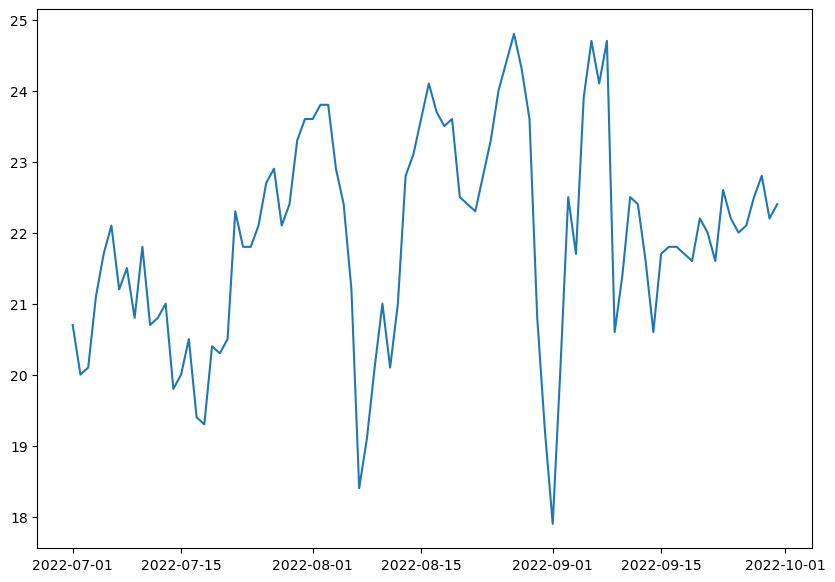

In [100]:
# Compute the 10th, 50th, and 90th percentiles for each JAS day using all years. Plot 
#the percentiles vs day of the summer (Figure 5).  Overplot temperature for the 
#summer of 2022.  

# percentiles
p10 = np.percentile(JAS['T'], 10)
p50 = np.percentile(JAS['T'], 50)
p90 = np.percentile(JAS['T'], 90)

df10 = JAS[JAS['T'] < p10]
df50 = JAS[JAS['T'] < p50]
df90 = JAS[JAS['T'] < p90]




# query year 2022
plt2022 = JAS[JAS['year'] == 2022]

fig, ax = plt.subplots(figsize=(10,7))
plt.plot(plt2022.index, plt2022['T'])
plt.plot(plt2022.index, df10['T'])


#### **Figure 6:** Number of JAS days above the 95th percentile

#### **Figure 7:** Time series plot of mean JAS temperature and heat wave days

#### **Figure 8:** Scatter plot of mean JAS temperature vs heat wave days 